# Data Science Assignment: Submitted by Deepak Mishra

In [1]:
!jupyter --version

jupyter core     : 4.7.1
jupyter-notebook : 6.4.0
qtconsole        : not installed
ipython          : 7.24.1
ipykernel        : 5.5.5
jupyter client   : 6.1.12
jupyter lab      : 3.0.16
nbconvert        : 6.0.7
ipywidgets       : 7.6.3
nbformat         : 5.1.3
traitlets        : 5.0.5


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 23 18:30:22 2018

@author: Deepak Mishra
"""
import pandas as pd

#READ THE DATA SHEET FROM EXCEL FILE
dt1=pd.read_excel("Data Science Assignment September 2018.xlsx",'Data')

In [2]:
#RENAME FIELD Lead ID to Lead_ID
dt1.rename(columns={'Lead ID':'Lead_ID'},inplace=True)

#CREATE A FIELD FROM post_date to YYYY-MM
dt1['YearMon'] = dt1.post_date.dt.to_period('M')

In [3]:
#INSPECTING DATA
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29029 entries, 0 to 29028
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Lead_ID           29029 non-null  int64         
 1   bankid            29029 non-null  int64         
 2   bank_account_id   29029 non-null  int64         
 3   account_number    29029 non-null  object        
 4   Industry          29029 non-null  object        
 5   post_date         29029 non-null  datetime64[ns]
 6   description       29029 non-null  object        
 7   transaction_type  29029 non-null  object        
 8   amount            29029 non-null  float64       
 9   running_balance   29029 non-null  float64       
 10  trans_order       29029 non-null  int64         
 11  YearMon           29029 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(4), object(4), period[M](1)
memory usage: 2.7+ MB


In [4]:
# CHECK FIRST FEW RECORDS
dt1.head()

,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,YearMon
0,321146,10479,13971,1,Retail Trade,2017-03-02,2017-03-01 00:00:00,credit,3.00,1032.65,2,2017-03
1,330698,8545,14374,1693,Health Care and Social Assistance,2017-01-13,#1008 Paid Check,debit,1062.78,6889.75,6,2017-01
2,330698,8545,14374,1693,Health Care and Social Assistance,2017-01-13,#1009 Paid Check,debit,1063.73,11125.54,2,2017-01
3,330698,8545,14374,1693,Health Care and Social Assistance,2017-01-17,#1011 Paid Check,debit,600.99,45497.83,28,2017-01
4,330698,8545,14374,1693,Health Care and Social Assistance,2017-01-13,#1012 Paid Check,debit,1284.15,21832.54,11,2017-01


In [5]:
#SEE THE DESCRIPTIVE STATS
dt1.describe()

,Lead_ID,bankid,bank_account_id,amount,running_balance,trans_order
count,29029.000000,29029.000000,29029.000000,29029.000000,29029.000000,29029.000000
mean,320714.718282,8823.888491,14052.030556,1927.453475,10247.851975,5.397223
std,5051.317064,683.963276,703.164708,7450.638452,20055.683105,5.445505
min,308148.000000,6192.000000,12460.000000,0.000000,-84727.980000,1.000000
25%,316728.000000,8534.000000,13234.000000,29.250000,798.850000,2.000000
50%,321380.000000,8535.000000,14049.000000,160.500000,3820.940000,4.000000
75%,323253.000000,8545.000000,14636.000000,788.460000,11898.880000,7.000000
max,330698.000000,10656.000000,15148.000000,419000.000000,437942.290000,48.000000


## Exercises

### Solutions to exercises in order

####  Exercise #1. Count the number of merchants, bank accounts and tabulate:

In [6]:
Num_Merchants=dt1.Lead_ID.nunique()
print("Number of Unique Merchants: ",Num_Merchants)
#Number of Unique Merchants:   21

Number of Unique Merchants:  21


##### Check If bank account_id and account_number are unique

In [7]:
dt1.groupby('Lead_ID')['bank_account_id','account_number'].nunique().sum()

/Users/deepak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


bank_account_id    53
account_number     52
dtype: int64

<b>There is one account number associated with 2 bank account id, this seems suspicious</b>

#### Exercise 1. (i) the number of bank accounts for each merchant

In [8]:
dt1.groupby('Lead_ID')['bank_account_id','account_number'].nunique()

/Users/deepak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,bank_account_id,account_number
Lead_ID,,
308148,1,1
310443,2,2
312745,5,5
313082,1,1
314036,1,1
314559,2,2
316728,6,6
318465,7,7
321146,2,1


<b>There customer 321146 one account number associated with 2 bank account id, this seems suspicious</b>

#### Exercise 1. (ii) the number of months of each bank account for which data is available.

In [9]:
#  convert the result to dataframe for better looks and analysis
res_ii=dt1.groupby(['Lead_ID','bank_account_id']).YearMon.nunique().reset_index()
print(res_ii.head())

#verify above result
dt1.loc[ dt1.bank_account_id==14045]

   Lead_ID  bank_account_id  YearMon
0   308148            12460       10
1   310443            12654        7
2   310443            12655       12
3   312745            12835        5
4   312745            12836        5


,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,YearMon
15906,326062,8535,14045,xxxx5576,Accommodation and Food Services,2017-01-25,Online Transfer to CHK ...0403 transaction#: x...,debit,0.54,50.00,1,2017-01
16120,326062,8535,14045,xxxx5576,Accommodation and Food Services,2016-12-05,Online Transfer to CHK ...9573 transaction#: x...,debit,50.00,50.54,1,2016-12


##### Exercise 1. #(iii) the total number of credits (deposits), debits (withdrawals) and their averages per month for each bank account and each merchant


In [10]:
res_iii=dt1.groupby(['Lead_ID','bank_account_id','transaction_type']
            ).agg({'amount': ['size','mean']}).reset_index()
print(res_iii.head())
#verify results
print(res_iii.loc[res_iii.bank_account_id==12836])
dt1.loc[ dt1.bank_account_id==12836]

  Lead_ID bank_account_id transaction_type amount              
                                             size          mean
0  308148           12460           credit    172    387.273430
1  308148           12460            debit    320    193.123844
2  310443           12654           credit     27  11434.547407
3  310443           12654            debit    223   1474.867175
4  310443           12655           credit      8   2050.055000
  Lead_ID bank_account_id transaction_type amount         
                                             size     mean
8  312745           12836           credit      3  6351.93
9  312745           12836            debit      5  3807.00


,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,YearMon
10263,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-06-03,DEPOSIT,credit,2555.79,2555.79,1,2016-06
10677,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-08-23,DEPOSIT MADE IN A BRANCH/STORE #xxxxx3963,credit,1500.00,2020.79,1,2016-08
10764,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-06-15,DEPOSIT MADE IN A BRANCH/STORE #xxxxx6367,credit,15000.00,15555.79,1,2016-06
14358,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-06-17,NSF RETURN ITEM FEE FOR A TRANSACTION RECEIVED...,debit,35.00,15520.79,1,2016-06
16443,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-11-21,ONLINE TRANSFER TO RANGOLI LLC BUSINESS CHECKI...,debit,500.00,20.79,1,2016-11
16447,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-10-06,ONLINE TRANSFER TO RANGOLI LLC BUSINESS CHECKI...,debit,1500.00,520.79,1,2016-10
24265,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-06-09,WITHDRAWAL MADE IN A BRANCH/STORE,debit,2000.00,555.79,1,2016-06
24266,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-07-06,WITHDRAWAL MADE IN A BRANCH/STORE,debit,15000.00,520.79,1,2016-07


##### Exercise 1. (iv) the total dollar value of credits, debits and their averages per month for each bank account and each merchant

In [11]:
res_iv=dt1.groupby(['Lead_ID','bank_account_id','transaction_type','YearMon']
            ).agg({'amount': ['size','sum','mean']}).reset_index()
res_iv.head()

Lead_ID bank_account_id transaction_type  YearMon amount                    
                                                      size      sum       mean
0  308148           12460           credit  2016-03      5  6098.62  1219.7240
1  308148           12460           credit  2016-04      1  1500.00  1500.0000
2  308148           12460           credit  2016-05      4   774.95   193.7375
3  308148           12460           credit  2016-06      4  2369.38   592.3450
4  308148           12460           credit  2016-07     20  8105.04   405.2520

##### Exercise 1. (v) Aggregate the answers to (iii) and (iv) at the merchant level, industry level and bankid level

In [12]:
res_v=dt1.groupby(['Lead_ID','bankid','Industry']
            ).agg({'amount': ['size','sum','mean']}).reset_index()
res_v.head()

Lead_ID bankid                                          Industry amount  \
                                                                     size   
0  308148   8535                   Accommodation and Food Services    492   
1  310443   6192                                      Construction    281   
2  312745   8544  Professional, Scientific, and Technical Services    760   
3  313082   8535  Professional, Scientific, and Technical Services   1138   
4  314036   9966                                      Retail Trade   2261   

                            
          sum         mean  
0   128410.66   260.997276  
1   671795.26  2390.730463  
2  1432688.42  1885.116342  
3  1105902.61   971.794912  
4   878894.92   388.719558

##### Exercise 1. (vi) Develop a slide visualizing the relationship between LeadID, bankid, bank_account_id and account_number 

In [13]:
dt1.groupby(['Lead_ID','bankid','bank_account_id','account_number']).size()

Lead_ID  bankid  bank_account_id  account_number
308148   8535    12460            xxxx9928           492
310443   6192    12654            xxxx9363           250
                 12655            xxxx9355            31
312745   8544    12835            2549                18
                 12836            7186                 8
                 12837            3266                 1
                 12838            8423                82
                 12839            3582               651
313082   8535    13233            xxxx4241          1138
314036   9966    13226            xxxx7053          2261
314559   8534    13271            xxxx3965           415
                 13273            xxxx3981            12
316728   8534    13272            xxxx4095           123
         8544    13228            8151               479
                 13230            4615                87
                 13232            8118              1708
                 13234            8126 



### Exercise 2. Consider Lead ID: 318465, bank_account_id: 13419  
#### - plot the withdrawals, deposits and end-of-day daily balance 
#### -as a daily time series; do the same for Lead ID: 316728, bank_account_id : 13232.

In [14]:
#SELECT DESIRED ACCOUNT ID
dt1=dt1.loc[(dt1.Lead_ID==318465) &  (dt1.bank_account_id==13419)].reset_index()

#MULTIPLY THE DEBIT AMOUNTS BY -1
dt1.loc[dt1.transaction_type=='debit','amount']=-1*dt1.amount

#SORT THE DATA BY DATE AND TRANSACTION ORDER
dt1.sort_values(['Lead_ID','bankid','bank_account_id','post_date','trans_order'], inplace=True)

#SET THE OPENING BALANCE FOR EACH ACCOUNT
dt1['amount'].iloc[0]= dt1['running_balance'].values[0]

#COMPUTE EOD BALANCE
grpby=dt1.groupby(['Lead_ID','bankid','bank_account_id','post_date'])['amount'].sum().reset_index()
grpby['EOD_BAL']=grpby.amount.cumsum()
print(grpby)

     Lead_ID  bankid  bank_account_id  post_date  amount  EOD_BAL
0     318465    9262            13419 2016-04-12  587.52   587.52
1     318465    9262            13419 2016-04-13 -238.65   348.87
2     318465    9262            13419 2016-04-14  -97.34   251.53
3     318465    9262            13419 2016-04-15 -187.37    64.16
4     318465    9262            13419 2016-04-16  418.15   482.31
..       ...     ...              ...        ...     ...      ...
219   318465    9262            13419 2016-12-11  -42.52  1436.25
220   318465    9262            13419 2016-12-12 -215.03  1221.22
221   318465    9262            13419 2016-12-13 -662.83   558.39
222   318465    9262            13419 2016-12-14  690.79  1249.18
223   318465    9262            13419 2016-12-15  738.81  1987.99

[224 rows x 6 columns]


/Users/deepak/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


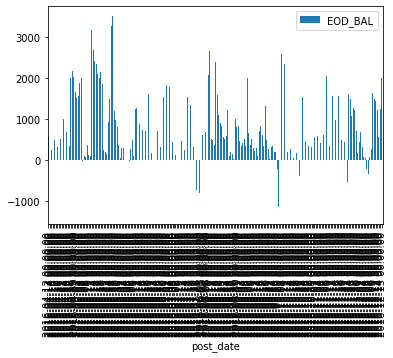

In [15]:
#PLOT THE EOD BALANCES
grpby.plot(x='post_date',y='EOD_BAL',kind='bar')

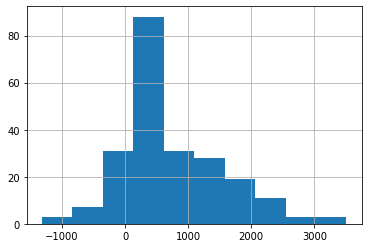

In [16]:
#CHECK THE DISTRIBUTION OF EOD BALANCE
grpby.EOD_BAL.hist()

In [17]:
#DESCRIPTIVE STATS OF EOD BALANCES
grpby.EOD_BAL.describe()

count     224.000000
mean      746.001696
std       808.487639
min     -1316.100000
25%       242.440000
50%       499.220000
75%      1250.092500
max      3508.180000
Name: EOD_BAL, dtype: float64

In [18]:
#DATA FOR WITHDRAWL AND DEPOSITS/ CREDIT AND DEBIT
#GET THE CREDIT AND DEBIT BY EOD
crdr=dt1.groupby(['Lead_ID','bankid','bank_account_id','post_date','transaction_type'])['amount'].sum().reset_index()
#GET THE CREDIT DEBIT AS SEPARATE COLUMNS FOR PLOTTING
pivt=(crdr.pivot_table(index=['Lead_ID','bankid','bank_account_id','post_date']
                      ,columns=  'transaction_type',values='amount' ).reset_index()
      )
pivt.fillna(value=0,inplace=True)

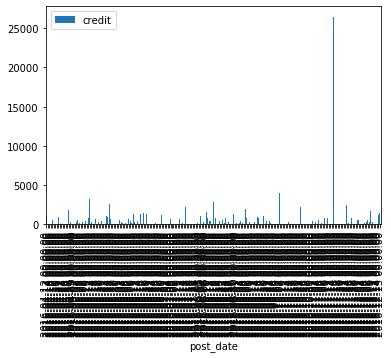

In [19]:
pivt.plot(x='post_date',y='credit',kind='bar')

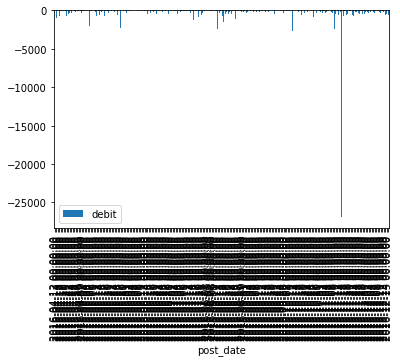

In [20]:
pivt.plot(x='post_date',y='debit',kind='bar')

### 3. For the merchants with the above Lead IDs, plot the withdrawals, deposits 
#### and end-of-day daily balance as a daily time series 
#### (aggregate over all their bank accounts)

In [22]:
#COMPUTE EOD BALANCE
#MULTIPLY THE DEBIT AMOUNTS BY -1
dt1.loc[dt1.transaction_type=='debit','amount']=-1*dt1.amount
# SELECT THE DATA FOR LEAD ID
dt11=dt1.loc[(dt1.Lead_ID==318465)].reset_index()
allacct = pd.DataFrame()
allpivt=pd.DataFrame()
#LOOP THOURGH ALL ACCOUNT ID OF A LEAD ID
for acct in dt11.bank_account_id.unique().tolist():
    #SELECT DESIRED ACCOUNT ID
    dt1=dt11.loc[(dt11.bank_account_id==acct)]
    
    #SORT THE DATA BY DATE AND TRANSACTION ORDER
    dt1.sort_values(['Lead_ID','bankid','bank_account_id','post_date','trans_order'], inplace=True)
    
    #SET THE OPENING BALANCE FOR EACH ACCOUNT
    dt1['amount'].iloc[0]= dt1['running_balance'].values[0]
    
    #COMPUTE EOD BALANCE
    grpby=dt1.groupby(['Lead_ID','bankid','bank_account_id','post_date'])['amount'].sum().reset_index()
    grpby['EOD_BAL']=grpby.amount.cumsum()
    allacct = allacct.append(grpby)
    print(grpby.EOD_BAL.describe())
    #GET THE CREDIT AND DEBIT BY EOD
    crdr=dt1.groupby(['Lead_ID','bankid','bank_account_id','post_date','transaction_type'])['amount'].sum().reset_index()
    #GET THE CREDIT DEBIT AS SEPARATE COLUMNS FOR PLOTTING
    pivt=(crdr.pivot_table(index=['Lead_ID','bankid','bank_account_id','post_date']
                          ,columns=  'transaction_type',values='amount' ).reset_index()
          )
    pivt.fillna(value=0,inplace=True)
    allpivt=allpivt.append(pivt)
    print(pivt.describe())

#NOW CREATE EOD BALANCE AT MERCHANT LEVEL
#COMPUTE EOD BALANCE
mrhtEOD=allacct.groupby(['Lead_ID','post_date'])['amount'].sum().reset_index()
mrhtEOD['EOD_BAL']=mrhtEOD.amount.cumsum()

count     224.000000
mean      746.001696
std       808.487639
min     -1316.100000
25%       242.440000
50%       499.220000
75%      1250.092500
max      3508.180000
Name: EOD_BAL, dtype: float64
transaction_type   Lead_ID  bankid  bank_account_id        credit  \
count                224.0   224.0            224.0    224.000000   
mean              318465.0  9262.0          13419.0    479.227813   
std                    0.0     0.0              0.0   1849.529488   
min               318465.0  9262.0          13419.0      0.000000   
25%               318465.0  9262.0          13419.0      0.000000   
50%               318465.0  9262.0          13419.0     51.040000   
75%               318465.0  9262.0          13419.0    500.000000   
max               318465.0  9262.0          13419.0  26523.590000   

transaction_type         debit  
count               224.000000  
mean               -470.352857  
std                1834.700882  
min              -26925.500000  
25%            

/Users/deepak/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


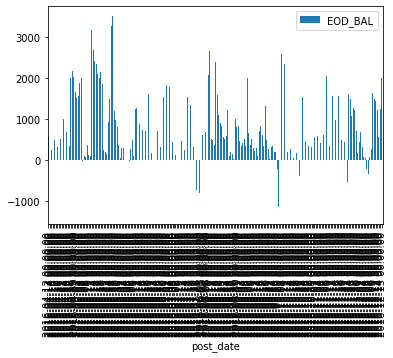

In [23]:
#PLOT THE EOD BALANCES
mrhtEOD.plot(x='post_date',y='EOD_BAL',kind='bar')

/Users/deepak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


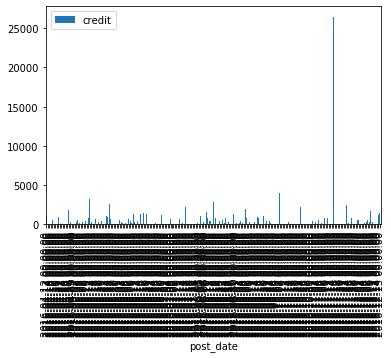

In [24]:
#CREDIT DEBIT AT MERCHANT LEVEL
crdrall=allpivt.groupby(['Lead_ID','post_date'])['credit','debit'].sum().reset_index()
crdrall.plot(x='post_date',y='credit',kind='bar')

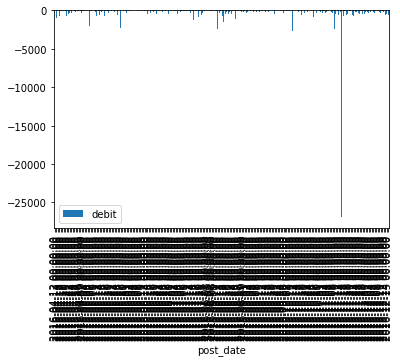

In [25]:
crdrall.plot(x='post_date',y='debit',kind='bar')

### EXERCISE #4. The cash flow of a business has many dimensions 
#### [for example, top 5 deposits/Total deposits,  
#### average # of days between two withdrawals, 
#### coefficient of variation of the daily balance] 
#### that are potentially relevant to a borrower’s ability to repay. 
#### Can you obtain the value of these variables for each merchant?
#### What other cash flow variables can you hypothesize that could be relevant  for predicting merchant default?

In [26]:
#TOP 5 DEPOSITS FOR EACH MERCHANT
deposits=dt1.loc[dt1.transaction_type=='credit']
topdep=deposits.groupby(['Lead_ID','post_date']).amount.sum().reset_index()
topdep.sort_values(by=['Lead_ID','amount'],ascending=[True,False],inplace=True)
Top5Dep=topdep.groupby('Lead_ID').head(5).reset_index()
print(Top5Dep)

   index  Lead_ID  post_date    amount
0    109   318465 2016-11-14  26523.59
1     88   318465 2016-10-07   3907.08
2     16   318465 2016-05-12   3167.12
3     64   318465 2016-08-15   2718.20
4     23   318465 2016-05-25   2462.92


In [27]:
#TOTAL DEPOSIT FOR EACH MERCHANT
TotalDep=topdep.groupby('Lead_ID').amount.sum().reset_index()
print(TotalDep)

   Lead_ID     amount
0   318465  107347.03


In [28]:
#RATIO OF TOP 5 DEPOSITIS TO TOTAL DEPOSITS
Top5Dep=Top5Dep.groupby('Lead_ID').amount.sum().reset_index()
Top5Dep.rename(columns={'amount':'Top5Deposits'},inplace=True)
ratioDep=pd.merge(Top5Dep,TotalDep,on='Lead_ID')
ratioDep['Ratio']=ratioDep.Top5Deposits/ratioDep.amount
print(ratioDep)

   Lead_ID  Top5Deposits     amount     Ratio
0   318465      38778.91  107347.03  0.361248


In [29]:
# average # of days between two withdrawals, 
withdrawls=dt1.loc[dt1.transaction_type=='debit']
withdrawls=deposits.groupby(['Lead_ID','post_date']).amount.sum().reset_index()
withdrawls['days_elapsed']=withdrawls.sort_values(['Lead_ID','post_date']).groupby('Lead_ID').post_date.diff().dt.days
withdrawls.describe()

,Lead_ID,amount,days_elapsed
count,128.0,128.000000,127.000000
mean,318465.0,838.648672,1.944882
std,0.0,2388.038710,1.415936
min,318465.0,0.750000,1.000000
25%,318465.0,165.552500,1.000000
50%,318465.0,432.185000,1.000000
75%,318465.0,861.465000,2.000000
max,318465.0,26523.590000,9.000000


In [30]:
avgdays=withdrawls.groupby('Lead_ID').days_elapsed.mean().reset_index()
print(avgdays)

   Lead_ID  days_elapsed
0   318465      1.944882


In [31]:
# coefficient of variation of the daily balance
from scipy.stats import variation 
mrhtEOD.groupby(['Lead_ID']).EOD_BAL.apply(lambda x: variation(x)).reset_index()

,Lead_ID,EOD_BAL
0,318465,1.081339


### What other cash flow variables can you hypothesize that could be relevant for predicting merchant default?
#### Number of times running balance is negative in last 12 months
#### Number of months when the average daily withdrawl is more than average daily deposits
#### Trends in EOD balance, is it increasing or decreasing recently
#### Variation in amount of deposits/ withdrawls i.e., consistent transaction of average amounts or few high value transactions
#### Source/ mode of transactions

### Exercise 5. Develop a program by which clusters of similar transactions for a merchant can be identified from transaction descriptions and other information

#### There are many ways to analyzing this problem
##### - one way is Clustering the Description of transactions
##### - Topic Modeling is another possibility

In [33]:
dt11=dt1.loc[(dt1.Lead_ID==318465) & (dt1.transaction_type=='credit')]
#GET THE TRANSACTION DESCRIPTION AS A LIST TO PROCESS
desc_trans=dt11.description.values.tolist()
#CHECK FEW VALUES
desc_trans[:10]

['Deposit - Online Banking Transfer from xxxxxx1584 CK',
 'Deposit - Mobile Banking',
 'Deposit - Mobile Banking',
 'External Deposit - ADVOCARE - PAYMENTS',
 'POS Deposit - AIRBNB 888 BRANNAN STREET SAN FRANCISCOCAUS - Card Ending In 2706',
 'Deposit - Transfer from ******1696',
 'Deposit - Mobile Banking',
 'Dividend/Interest',
 'Deposit - Online Banking Transfer from xxxxxx6643 CK',
 'Deposit - Online Banking Transfer from xxxxxx1696 CK']

In [34]:
#WE WILL USE K MEANS CLUSTERING ON DESCRIPTIONS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# CONVERT THE DESCRIPTION TEXT TO VECTORS
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(desc_trans)

Text(0, 0.5, 'SSE')

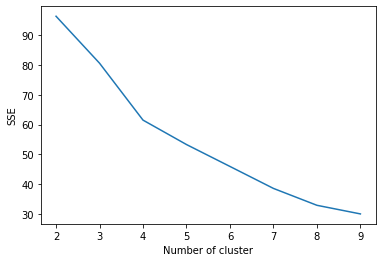

In [35]:
#FIND OUT OPTIMAL NUMBER OF CLUSTERS
#METHOD 1: Elbow curve based on SSE 
sse = {}
slh={}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ 
#    this is to find silhouette score
    label = kmeans.labels_
    slh[k] = silhouette_score(X, label, metric='euclidean')
#PLOT THE GRAPHS
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
# plt.show()

Text(0, 0.5, 'Silhouette Score')

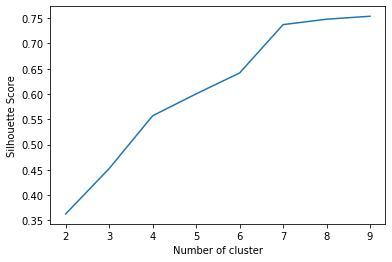

In [36]:
#METHOD 2: Using  silhouette score: higher the better
plt.figure()
plt.plot(list(slh.keys()), list(slh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
# plt.show()

In [37]:
#####################################################
#GET num_clus FROM ABOVE 2 METHODS AND FIT THE FINAL CLSUTER
num_clus = 4
model = KMeans(n_clusters=num_clus, init='k-means++', max_iter=100, n_init=2)
model.fit(X)

print("Top terms per cluster:")
clus_cent = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clus):
    print("Cluster %d:" % i),
    for ind in clus_cent[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 advocare
 payments
 external
 deposit
 card
 cash
 cellars
 callahan
 dep
 ck
Cluster 1:
 ck
 online
 transfer
 xxxxxx1696
 banking
 deposit
 xxxxxx6643
 xxxxxx4335
 xxxxxx1584
 cindra
Cluster 2:
 mobile
 deposit
 banking
 ending
 card
 waus
 pos
 sq
 bothell
 atm
Cluster 3:
 dividend
 xxxxxxxxxxx40
 ck
 demand
 cs
 creek
 courtesy
 comcast
 cindra
 deposit


In [38]:
# The model can be used to predict the cluster of new transaction
Y = vectorizer.transform(['ATM Deposit - BECU 317 NW GILMAN BLVD ISSAQUAH WAUS - Card Ending In 8648'])
prediction = model.predict(Y)
print(prediction)

[2]


The above transaction belongs to Cluster 2

In [43]:
for tx in desc_trans[:10]:
    Y = vectorizer.transform([tx])
    print(model.predict(Y))



[1]
[2]
[2]
[0]
[2]
[2]
[2]
[3]
[1]
[1]
